# Analysis of HDL Bits Data

This notebook contains the complete analysis and visualization of the HDL Bits data, including the comparison between the first pass and feedback phases. The analysis includes bar plots for different levels and categories, as well as aggregate status comparisons.

The plots are generated using Seaborn with the 'tab10' color palette and increased font sizes for better readability.

In [1]:
# Required Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
# Function to calculate the summary with rates
def calculate_summary_with_rates(df,llm='none'):
    # Grouping by problem, level1, level2, and category
    summary = df.groupby(['problem', 'level1', 'level2', 'category']).agg(
        Success=pd.NamedAgg(column='status', aggfunc=lambda x: (x == "Success").sum()),
        Incorrect=pd.NamedAgg(column='status', aggfunc=lambda x: (x == "Incorrect").sum()),
        Compile_error=pd.NamedAgg(column='status', aggfunc=lambda x: (x == "Compile error").sum()),
        Simulation_error=pd.NamedAgg(column='status', aggfunc=lambda x: (x == "Simulation error").sum()),
    ).reset_index()

    # Calculating total attempts
    summary['Total attempts'] = summary[['Success', 'Incorrect', 'Compile_error', 'Simulation_error']].sum(axis=1)
    
    # Calculating success, incorrect, and compile rates
    summary['Success Rate (%)'] = (summary['Success'] / summary['Total attempts']) * 100
    summary['Incorrect Rate (%)'] = ((summary['Incorrect'] + summary['Simulation_error']) / summary['Total attempts']) * 100
    summary['Compile Rate (%)'] = (summary['Compile_error'] / summary['Total attempts']) * 100
    
        return summary




# Defining the status messages
status_messages = {
    "Success": "Status: Success!",
    "Incorrect": "Status: Incorrect",
    "Compile error": "Status: Compile Error",
    "Simulation error": "Status: Simulation Error"
}




In [32]:
feedback_csv_path = 'HDLBits_claude_results_feedback_with_categories.csv'
feedback_df = pd.read_csv(feedback_csv_path)

# Replacing the status messages with the defined categories
feedback_df['status'] = feedback_df['status'].replace(status_messages.values(), status_messages.keys())

# Calculating the summary for the feedback DataFrame
final_summary_feedback_recounted = calculate_summary_with_rates(feedback_df)
final_summary_feedback_recounted.head()


,problem,level1,level2,category,Success,Incorrect,Compile_error,Simulation_error,Total attempts,Success Rate (%),Incorrect Rate (%),Compile Rate (%)
0,7420_a,Circuits,Combinational Logic,Basic Gates,0,4,0,0,4,0.0,100.0,0.0
1,Adder100_a,Circuits,Combinational Logic,Arithmetic Circuits,0,0,20,0,20,0.0,0.0,100.0
2,Adder3_a,Circuits,Combinational Logic,Arithmetic Circuits,0,0,20,0,20,0.0,0.0,100.0
3,Conwaylife,Circuits,More Circuits,Cellular automata,0,2,18,0,20,0.0,10.0,90.0
4,Count_clock,Circuits,Sequential Logic,Counters,0,17,3,0,20,0.0,85.0,15.0


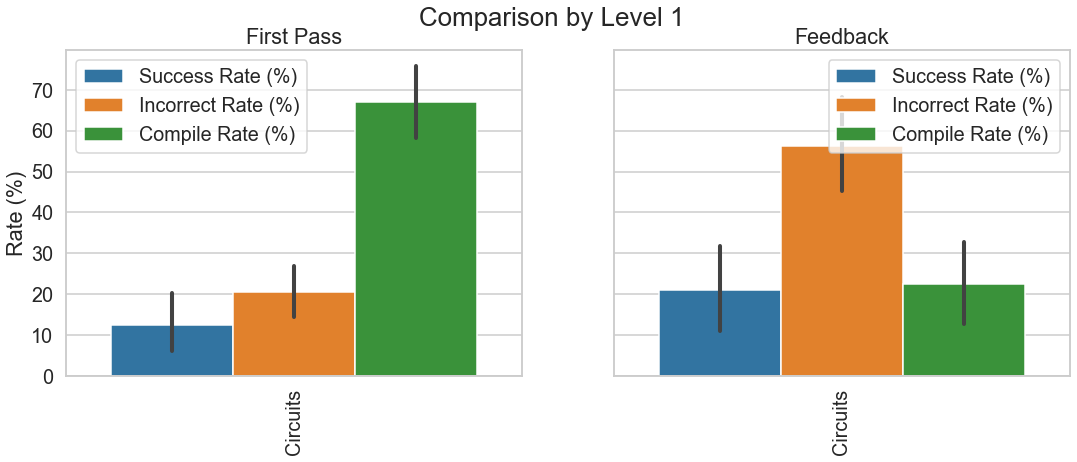

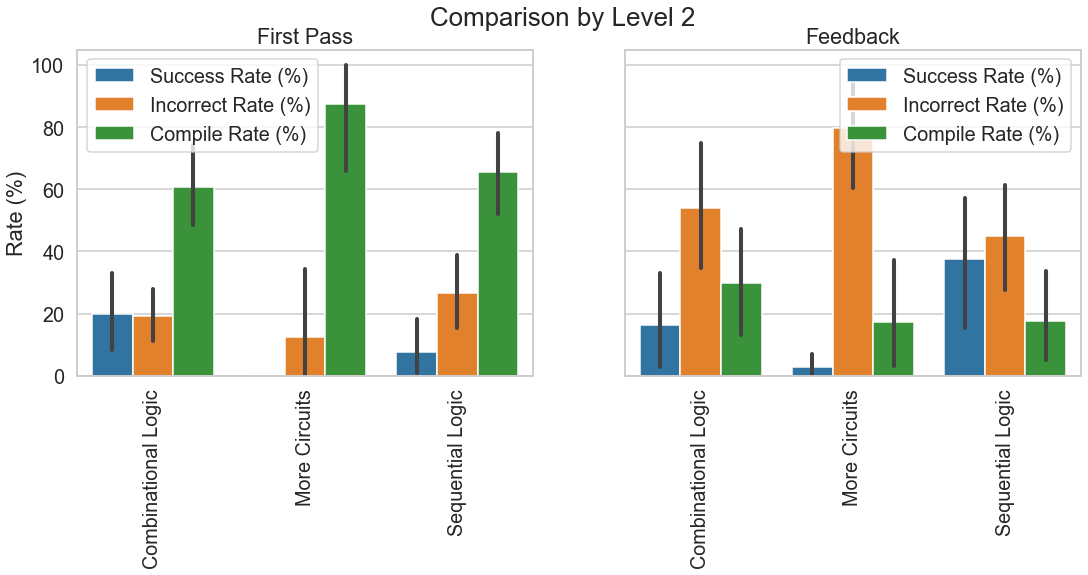

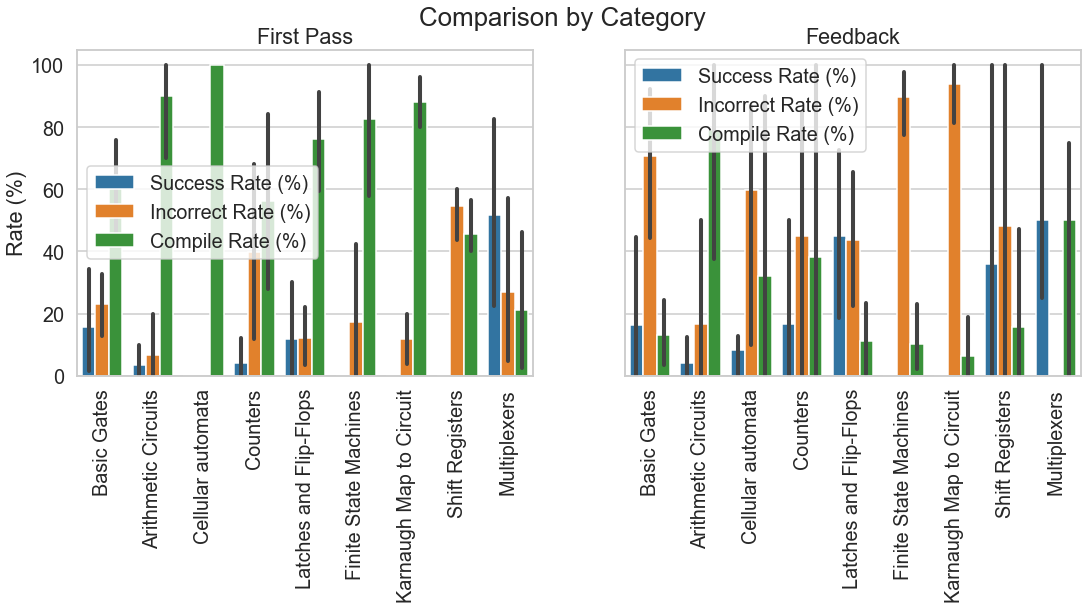

In [35]:
# Function to plot bar plots for comparison between original and feedback summaries
def plot_comparison_bars(original_summary, feedback_summary, group_column, title, y_label, palette="tab10"):
    # Melt the summaries for plotting
    original_melted = original_summary.melt(id_vars=[group_column], value_vars=['Success Rate (%)', 'Incorrect Rate (%)', 'Compile Rate (%)'])
    feedback_melted = feedback_summary.melt(id_vars=[group_column], value_vars=['Success Rate (%)', 'Incorrect Rate (%)', 'Compile Rate (%)'])

    # Set the seaborn style
    sns.set_theme(style="whitegrid")
    sns.set_context("talk", font_scale=1.2)

    # Initialize the plot
    fig, axes = plt.subplots(1, 2, figsize=(18, 6), sharey=True)
    
    # Plot the original summary
    sns.barplot(data=original_melted, x=group_column, y='value', hue='variable', ax=axes[0], palette=palette)
    axes[0].set_title('First Pass')
    axes[0].set_ylabel(y_label)
    axes[0].set_xlabel('')
    axes[0].legend().set_title('')
    
    # Plot the feedback summary
    sns.barplot(data=feedback_melted, x=group_column, y='value', hue='variable', ax=axes[1], palette=palette)
    axes[1].set_title('Feedback')
    axes[1].set_ylabel('')
    axes[1].set_xlabel('')
    axes[1].legend().set_title('')

    # Rotate the x-axis labels for better visibility
    for ax in axes:
        for label in ax.get_xticklabels():
            label.set_rotation(90)

    # Set the overall title
    fig.suptitle(title)
    
    fig.savefig(f'Figure_{group_column}.png', dpi=400,bbox_inches='tight')
    plt.show()

# Plotting the comparison bar plots
plot_comparison_bars(final_summary_original_recounted, final_summary_feedback_recounted, 'level1', 'Comparison by Level 1', 'Rate (%)')
plot_comparison_bars(final_summary_original_recounted, final_summary_feedback_recounted, 'level2', 'Comparison by Level 2', 'Rate (%)')
plot_comparison_bars(final_summary_original_recounted, final_summary_feedback_recounted, 'category', 'Comparison by Category', 'Rate (%)')


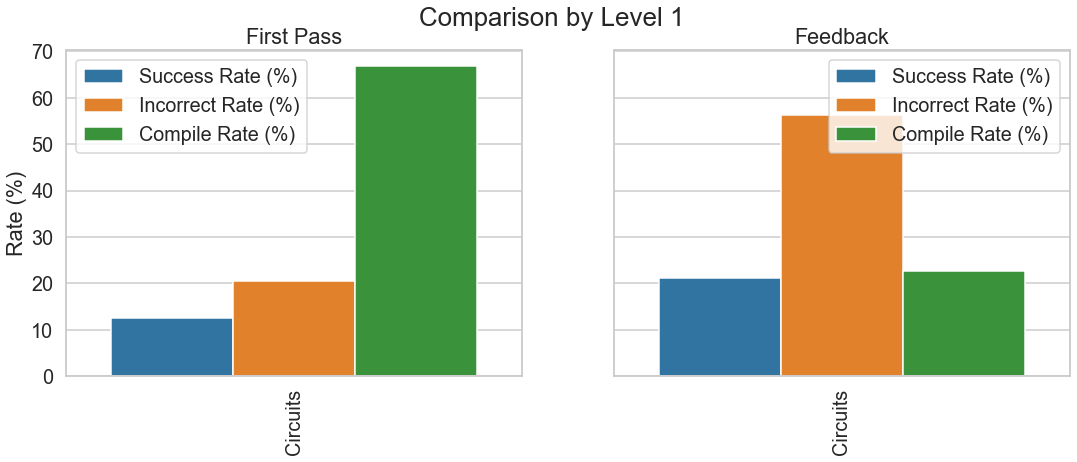

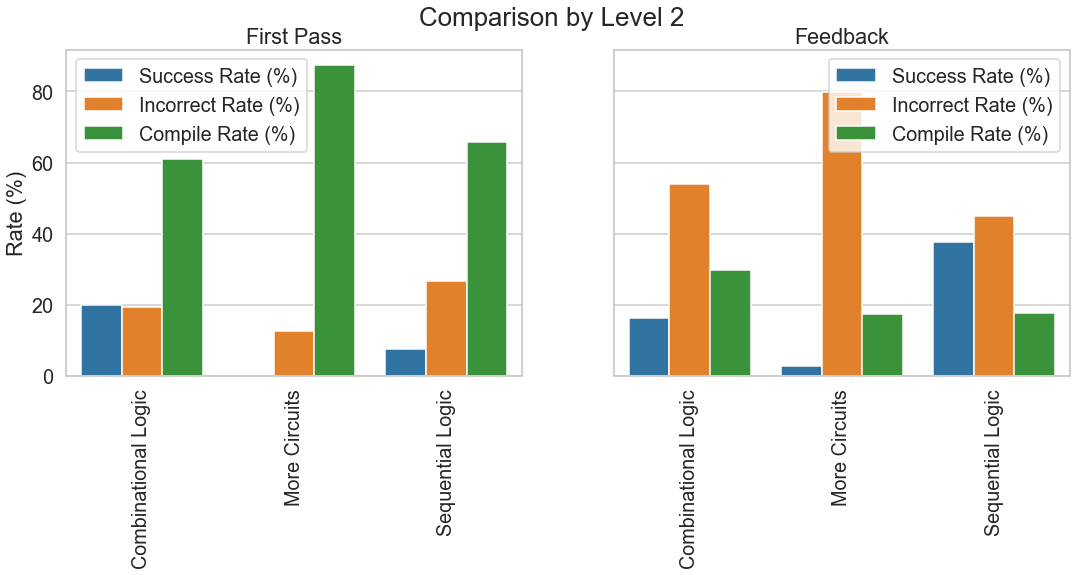

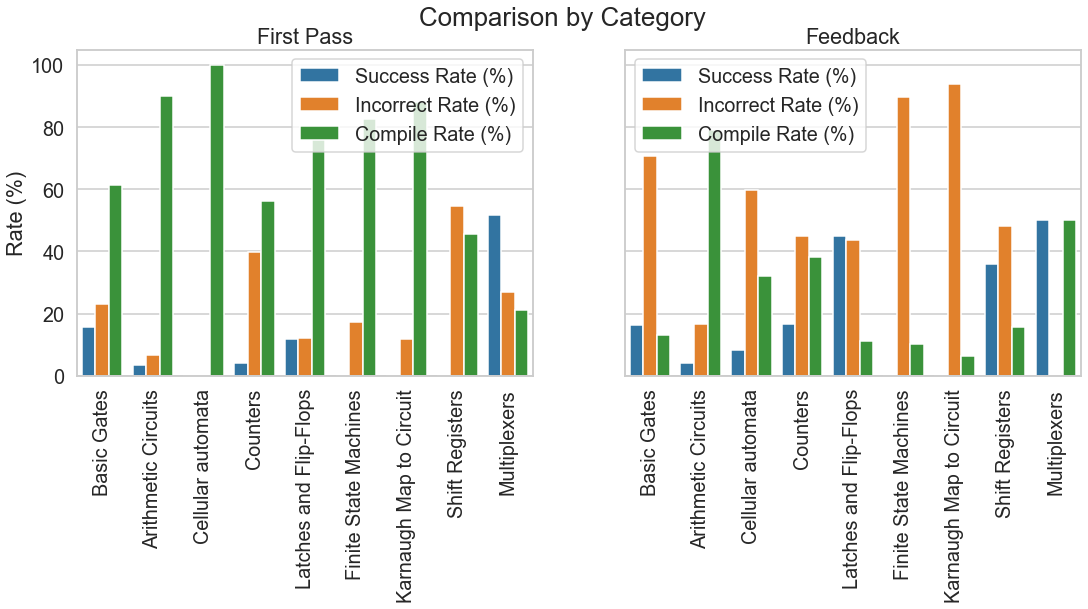

In [41]:
# Updated function to plot bar plots without error bars
def plot_comparison_bars_no_error_bars(original_summary, feedback_summary, group_column, title, y_label, palette="tab10"):
    original_melted = original_summary.melt(id_vars=[group_column], value_vars=['Success Rate (%)', 'Incorrect Rate (%)', 'Compile Rate (%)'])
    feedback_melted = feedback_summary.melt(id_vars=[group_column], value_vars=['Success Rate (%)', 'Incorrect Rate (%)', 'Compile Rate (%)'])
    sns.set_theme(style="whitegrid")
    sns.set_context("talk", font_scale=1.2)
    fig, axes = plt.subplots(1, 2, figsize=(18, 6), sharey=True)
    sns.barplot(data=original_melted, x=group_column, y='value', hue='variable', ax=axes[0], palette=palette, errorbar=None)
    axes[0].set_title('First Pass')
    axes[0].set_ylabel(y_label)
    axes[0].set_xlabel('')
    axes[0].legend().set_title('')
    sns.barplot(data=feedback_melted, x=group_column, y='value', hue='variable', ax=axes[1], palette=palette, errorbar=None)
    axes[1].set_title('Feedback')
    axes[1].set_ylabel('')
    axes[1].set_xlabel('')
    axes[1].legend().set_title('')
    for ax in axes:
        for label in ax.get_xticklabels():
            label.set_rotation(90)
    fig.suptitle(title)
    plt.show()

# Plotting the comparison bar plots without error bars
plot_comparison_bars_no_error_bars(final_summary_original_recounted, final_summary_feedback_recounted, 'level1', 'Comparison by Level 1', 'Rate (%)')
plot_comparison_bars_no_error_bars(final_summary_original_recounted, final_summary_feedback_recounted, 'level2', 'Comparison by Level 2', 'Rate (%)')
plot_comparison_bars_no_error_bars(final_summary_original_recounted, final_summary_feedback_recounted, 'category', 'Comparison by Category', 'Rate (%)')


In [3]:
# Custom color palette with lighter shades
custom_palette = {
    "Success Rate (%)": '#FDEAA8',  # Light green for success
    "Incorrect Rate (%)": '#87CEEB',  # Light blue for incorrect (keeping the color same as before)
    "Compile Rate (%)" : '#F08080'  # Light red for compile
}


# Updated function to plot bar plots with custom colors
def plot_comparison_bars_custom_colors(original_summary, feedback_summary, group_column, title, y_label):
    original_melted = original_summary.melt(id_vars=[group_column], value_vars=['Success Rate (%)', 'Incorrect Rate (%)', 'Compile Rate (%)'])
    feedback_melted = feedback_summary.melt(id_vars=[group_column], value_vars=['Success Rate (%)', 'Incorrect Rate (%)', 'Compile Rate (%)'])
    sns.set_theme(style="whitegrid")
    sns.set_context("talk", font_scale=1.2)
    fig, axes = plt.subplots(1, 2, figsize=(18, 6), sharey=True)
    sns.barplot(data=original_melted, x=group_column, y='value', hue='variable', ax=axes[0], palette=custom_palette, errorbar=None)
    axes[0].set_title('First Pass')
    axes[0].set_ylabel(y_label)
    axes[0].set_xlabel('')
    axes[0].legend().set_title('')
    sns.barplot(data=feedback_melted, x=group_column, y='value', hue='variable', ax=axes[1], palette=custom_palette, errorbar=None)
    axes[1].set_title('Feedback')
    axes[1].set_ylabel('')
    axes[1].set_xlabel('')
    axes[1].legend().set_title('')
    for ax in axes:
        for label in ax.get_xticklabels():
            label.set_rotation(90)
    fig.suptitle(title)
    desc='_'.join(title.split(' '))
    fig.savefig(f'Figure_{desc}.png', dpi=400,bbox_inches='tight')
    plt.show()



In [4]:
# Function to plot side-by-side stacked bar plots for comparison between original and feedback summaries
def plot_side_by_side_stacked_bars(original_summary, feedback_summary, group_column, title):
    # Aggregating the data by the specified group column
    original_grouped = original_summary.groupby(group_column).agg({
        'Success Rate (%)': 'sum',
        'Incorrect Rate (%)': 'sum',
        'Compile Rate (%)': 'sum'
    }).reset_index()
    feedback_grouped = feedback_summary.groupby(group_column).agg({
        'Success Rate (%)': 'sum',
        'Incorrect Rate (%)': 'sum',
        'Compile Rate (%)': 'sum'
    }).reset_index()

    # Setting up the subplots
    fig, axes = plt.subplots(1, 2, figsize=(18, 6), sharey=True)
    plt.suptitle(title)

    # Plotting the original summary
    original_grouped.plot(ax=axes[0], x=group_column, y=['Success Rate (%)', 'Incorrect Rate (%)', 'Compile Rate (%)'],
                          kind='bar', stacked=True, color=custom_palette.values())
    axes[0].set_title('(w/o) Feedback')
    axes[0].set_ylabel('Pass@k')
    axes[0].set_xlabel('')
    axes[0].legend(loc = "upper left").set_title('Rate Type')
    axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=90)

    # Plotting the feedback summary
    feedback_bars = feedback_grouped.plot(ax=axes[1], x=group_column, y=['Success Rate (%)', 'Incorrect Rate (%)', 'Compile Rate (%)'],
                          kind='bar', stacked=True, color=custom_palette.values())
    
    # Adding a pattern to feedback bars
    for bar in feedback_bars.patches:
        bar.set_hatch('//')
        
    axes[1].set_title('(w) Feedback')
    axes[1].set_ylabel('')
    axes[1].set_xlabel('')
    # axes[1].legend(loc = "upper left").set_title('Rate Type')
    axes[1].legend().set_visible(False)
    axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=90)
    
    desc='_'.join(title.split(' '))
    
    fig.savefig(f'Figure_{desc}.png', dpi=400,bbox_inches='tight')
    
    plt.show()



In [5]:
# Function to plot normalized side-by-side stacked bar plots for comparison between original and feedback summaries
def plot_normalized_side_by_side_stacked_bars(original_summary, feedback_summary, group_column, title):
    # Aggregating the data by the specified group column
    original_grouped = original_summary.groupby(group_column).agg({
        'Success Rate (%)': 'sum',
        'Incorrect Rate (%)': 'sum',
        'Compile Rate (%)': 'sum'
    }).reset_index()
    feedback_grouped = feedback_summary.groupby(group_column).agg({
        'Success Rate (%)': 'sum',
        'Incorrect Rate (%)': 'sum',
        'Compile Rate (%)': 'sum'
    }).reset_index()

    # Normalizing the rates to be contained within 100%
    original_grouped['Total Rate'] = original_grouped[['Success Rate (%)', 'Incorrect Rate (%)', 'Compile Rate (%)']].sum(axis=1)
    feedback_grouped['Total Rate'] = feedback_grouped[['Success Rate (%)', 'Incorrect Rate (%)', 'Compile Rate (%)']].sum(axis=1)
    for rate_column in ['Success Rate (%)', 'Incorrect Rate (%)', 'Compile Rate (%)']:
        original_grouped[rate_column] = (original_grouped[rate_column] / original_grouped['Total Rate']) * 100
        feedback_grouped[rate_column] = (feedback_grouped[rate_column] / feedback_grouped['Total Rate']) * 100

    # Plotting the side-by-side stacked bar plots
    plot_side_by_side_stacked_bars(original_grouped, feedback_grouped, group_column, title)



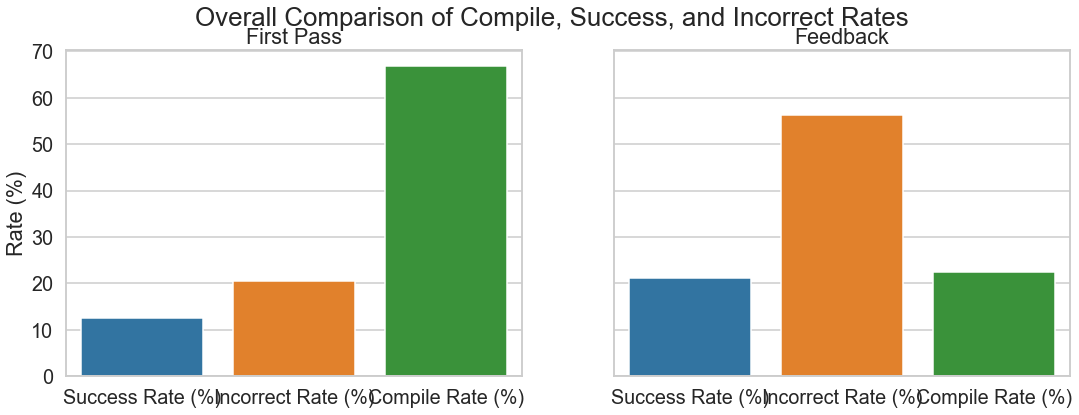

In [39]:
# Function to plot the overall comparison between original and feedback summaries side by side
def plot_overall_status_comparison_side_by_side(original_summary, feedback_summary, title, palette="tab10"):
    # Calculating the overall percentages for original and feedback summaries
    overall_original = original_summary[['Success Rate (%)', 'Incorrect Rate (%)', 'Compile Rate (%)']].mean().reset_index()
    overall_feedback = feedback_summary[['Success Rate (%)', 'Incorrect Rate (%)', 'Compile Rate (%)']].mean().reset_index()

    # Adding labels for original and feedback
    overall_original['Phase'] = 'First Pass'
    overall_feedback['Phase'] = 'Feedback'
    
    # Concatenating the original and feedback summaries
    overall_comparison = pd.concat([overall_original, overall_feedback], ignore_index=True)
    overall_comparison.columns = ['Status', 'Rate (%)', 'Phase']

    # Set the seaborn style
    sns.set_theme(style="whitegrid")
    sns.set_context("talk", font_scale=1.2)

    # Initialize the plot
    fig, axes = plt.subplots(1, 2, figsize=(18, 6), sharey=True)
    
    # Plot the original summary
    sns.barplot(data=overall_comparison[overall_comparison['Phase'] == 'First Pass'], x='Status', y='Rate (%)', ax=axes[0], palette=palette)
    axes[0].set_title('First Pass')
    axes[0].set_ylabel('Rate (%)')
    axes[0].set_xlabel('')
    
    # Plot the feedback summary
    sns.barplot(data=overall_comparison[overall_comparison['Phase'] == 'Feedback'], x='Status', y='Rate (%)', ax=axes[1], palette=palette)
    axes[1].set_title('Feedback')
    axes[1].set_ylabel('')
    axes[1].set_xlabel('')

    # Set the overall title
    fig.suptitle(title)
    desc='_'.join(title.split(' '))
    fig.savefig(f'Figure_{desc}.png', dpi=400,bbox_inches='tight')
    
    plt.show()

# Plotting the overall comparison between the first pass and feedback
plot_overall_status_comparison_side_by_side(final_summary_original_recounted, final_summary_feedback_recounted, 'Overall Comparison of Compile, Success, and Incorrect Rates')


In [19]:
# overall_palette = {
#     "(w/o) Feedback": {
#         "Success Rate (%)": "#66FF66",  # Lighter shade of green
#         "Incorrect Rate (%)": "#66B2FF",  # Lighter shade of blue
#         "Compile Rate (%)": "#FF9999"  # Lighter shade of red
#     },
#     "(w) Feedback": {
#         "Success Rate (%)": "#99FF99",  # Even lighter shade of green
#         "Incorrect Rate (%)": "#99CCFF",  # Even lighter shade of blue
#         "Compile Rate (%)": "#FFCCCC"  # Even lighter shade of red
#     }
# }

overall_palette = {
    "(w/o) Feedback": {
        "Success Rate (%)": "#FDEAA8",  # Lighter shade of green
        "Incorrect Rate (%)": "#87CEEB",  # Lighter shade of blue
        "Compile Rate (%)": "#F08080"  # Lighter shade of red
    },
    "(w) Feedback": {
        "Success Rate (%)": '#FDEAA8',  # Light green for success
    "Incorrect Rate (%)": '#87CEEB',  # Light blue for incorrect (keeping the color same as before)
    "Compile Rate (%)" : '#F08080'  # Light red for compile
    },
    "Decomposed Prompt": {
        "Success Rate (%)": '#FDEAA8',  # Light green for success
    "Incorrect Rate (%)": '#87CEEB',  # Light blue for incorrect (keeping the color same as before)
    "Compile Rate (%)" : '#F08080'  # Light red for compile
    }
}



# Function to plot overall comparison bars with specified custom colors (corrected)
def plot_overall_comparison_bars_custom_colors_corrected(original_summary, feedback_summary, title, y_label):
    overall_original = original_summary[['Success Rate (%)', 'Incorrect Rate (%)', 'Compile Rate (%)']].mean().reset_index()
    overall_original['Type'] = '(w/o) Feedback'
    overall_feedback = feedback_summary[['Success Rate (%)', 'Incorrect Rate (%)', 'Compile Rate (%)']].mean().reset_index()
    overall_feedback['Type'] = '(w) Feedback'
    overall_data = pd.concat([overall_original, overall_feedback], axis=0)
    overall_data.rename(columns={'index': 'Rate Type', 0: 'Value'}, inplace=True)
    
    # Plotting the comparison with custom colors
    sns.set_theme(style="whitegrid")
    sns.set_context("talk", font_scale=1.2)
    plt.figure(figsize=(10, 6))
    barplot = sns.barplot(data=overall_data, x='Rate Type', y='Value', hue='Type', errorbar=None)
    for idx, patch in enumerate(barplot.patches):
        rate_type = overall_data.iloc[idx]['Rate Type']
        type_label = overall_data.iloc[idx]['Type']
        patch.set_facecolor(overall_palette[type_label][rate_type])
    plt.title(title)
    plt.ylabel(y_label)
    plt.xlabel('')
    plt.legend(loc = "upper left").set_title('')
    desc='_'.join(title.split(' '))
    plt.savefig(f'Figure_{desc}.png', format='png', dpi=400,bbox_inches='tight')
    plt.show()



In [22]:
# Function to plot overall comparison bars with specified custom colors and patterns for feedback bars (corrected)
def plot_overall_comparison_bars_custom_colors_with_pattern_corrected(original_summary, feedback_summary,decom_summary, title, y_label):
    overall_original = original_summary[['Success Rate (%)', 'Incorrect Rate (%)', 'Compile Rate (%)']].mean().reset_index()
    overall_original['Type'] = '(w/o) Feedback'
    overall_feedback = feedback_summary[['Success Rate (%)', 'Incorrect Rate (%)', 'Compile Rate (%)']].mean().reset_index()
    overall_feedback['Type'] = '(w) Feedback'
    overall_decom = decom_summary[['Success Rate (%)', 'Incorrect Rate (%)', 'Compile Rate (%)']].mean().reset_index()
    overall_decom['Type'] = 'Decomposed Prompt'
    
    overall_data = pd.concat([overall_original, overall_feedback, overall_decom], axis=0)
    overall_data.rename(columns={'index': 'Rate Type', 0: 'Value'}, inplace=True)
    
    # Plotting the comparison with custom colors and pattern for feedback bars
    sns.set_theme(style="whitegrid")
    sns.set_context("talk", font_scale=1.2)
    plt.figure(figsize=(10, 6))
    barplot = sns.barplot(data=overall_data, x='Rate Type', y='Value', hue='Type')
    for idx, patch in enumerate(barplot.patches):
        rate_type = overall_data.iloc[idx]['Rate Type']
        type_label = overall_data.iloc[idx]['Type']
        patch.set_facecolor(overall_palette[type_label][rate_type])
        # Adding a pattern to feedback bars
        if type_label == '(w) Feedback':
            patch.set_hatch('//')
            
        if type_label == 'Decomposed Prompt':
            patch.set_hatch('\\')
    plt.title(title)
    plt.ylabel(y_label)
    plt.xlabel('')
    plt.legend(loc = "upper right").set_title('')
    desc = '_'.join(title.split(' '))
    plt.savefig(f'Figure_{desc}.png', format='png', dpi=400, bbox_inches='tight')
    plt.show()



In [8]:
from matplotlib.patches import Patch

# Function to plot overall comparison bars with custom colors and patterns (updated legend)
def plot_overall_comparison_bars_custom_colors_with_pattern_updated(original_summary, feedback_summary, title, y_label):
    overall_original = original_summary[['Success Rate (%)', 'Incorrect Rate (%)', 'Compile Rate (%)']].mean().reset_index()
    overall_original['Type'] = '(w/o) Feedback'
    overall_feedback = feedback_summary[['Success Rate (%)', 'Incorrect Rate (%)', 'Compile Rate (%)']].mean().reset_index()
    overall_feedback['Type'] = '(w) Feedback'
    overall_data = pd.concat([overall_original, overall_feedback], axis=0)
    overall_data.rename(columns={'index': 'Rate Type', 0: 'Value'}, inplace=True)
    
    # Plotting the comparison with custom colors and pattern for feedback bars
    sns.set_theme(style="whitegrid")
    sns.set_context("talk", font_scale=1.2)
    plt.figure(figsize=(10, 6))
    barplot = sns.barplot(data=overall_data, x='Rate Type', y='Value', hue='Type')
    
    # Creating patches for the legend
    legend_patches = [
        Patch(facecolor=overall_palette['(w/o) Feedback']['Success Rate (%)'], label='Success Rate (w/o) Feedback'),
        Patch(facecolor=overall_palette['(w) Feedback']['Success Rate (%)'], label='Success Rate (w) Feedback', hatch='//'),
        Patch(facecolor=overall_palette['(w/o) Feedback']['Incorrect Rate (%)'], label='Incorrect Rate (w/o) Feedback'),
        Patch(facecolor=overall_palette['(w) Feedback']['Incorrect Rate (%)'], label='Incorrect Rate (w) Feedback', hatch='//'),
        Patch(facecolor=overall_palette['(w/o) Feedback']['Compile Rate (%)'], label='Compile Rate (w/o) Feedback'),
        Patch(facecolor=overall_palette['(w) Feedback']['Compile Rate (%)'], label='Compile Rate (w) Feedback', hatch='//')
    ]

    for idx, patch in enumerate(barplot.patches):
        rate_type = overall_data.iloc[idx]['Rate Type']
        type_label = overall_data.iloc[idx]['Type']
        patch.set_facecolor(overall_palette[type_label][rate_type])
        # Adding a pattern to feedback bars
        if type_label == '(w) Feedback':
            patch.set_hatch('//')

    plt.title(title)
    plt.ylabel(y_label)
    plt.xlabel('')
    # legend=plt.legend(handles=legend_patches, loc="upper left")
    # Scale the bounding box of the legend by the specified factor
    legend = plt.legend(handles=legend_patches, loc="upper left", fontsize='small', frameon=True)

    desc = '_'.join(title.split(' '))
    plt.savefig(f'Figure_{desc}.png', format='png', dpi=400, bbox_inches='tight')
    plt.show()



In [51]:
original_csv_path = 'HDLBits_chatgpt_results_firstpass_with_categories_v1.csv'
original_df = pd.read_csv(original_csv_path)
# Counting the status categories
original_df['status'] = original_df['status'].replace(status_messages.values(), status_messages.keys())


# Generating the summary with rates for the first pass
final_summary_original_recounted = calculate_summary_with_rates(original_df)
final_summary_original_recounted.head()


,problem,level1,level2,category,Success,Incorrect,Compile_error,Simulation_error,Total attempts,Success Rate (%),Incorrect Rate (%),Compile Rate (%)
0,7420_a,Circuits,Combinational Logic,Basic Gates,4,0,1,0,5,80.0,0.0,20.0
1,7420_b,Circuits,Combinational Logic,Basic Gates,0,0,5,0,5,0.0,0.0,100.0
2,Adder100_a,Circuits,Combinational Logic,Arithmetic Circuits,3,0,2,0,5,60.0,0.0,40.0
3,Adder3_a,Circuits,Combinational Logic,Arithmetic Circuits,2,0,3,0,5,40.0,0.0,60.0
4,Bcdadd4_b,Circuits,Combinational Logic,Arithmetic Circuits,0,0,5,0,5,0.0,0.0,100.0


In [53]:
llm=''
feedback_csv_path = 'HDLBits_chatgpt_results_feedback_with_categories_v1.csv'
feedback_df = pd.read_csv(feedback_csv_path)

# Replacing the status messages with the defined categories
feedback_df['status'] = feedback_df['status'].replace(status_messages.values(), status_messages.keys())

# Calculating the summary for the feedback DataFrame
final_summary_feedback_recounted = calculate_summary_with_rates(feedback_df,llm)
final_summary_feedback_recounted.head()


,problem,level1,level2,category,Success,Incorrect,Compile_error,Simulation_error,Total attempts,Success Rate (%),Incorrect Rate (%),Compile Rate (%)
0,7420_a,Circuits,Combinational Logic,Basic Gates,0,0,4,0,4,0.000000,0.000000,100.000000
1,7420_b,Circuits,Combinational Logic,Basic Gates,1,15,79,0,95,1.052632,15.789474,83.157895
2,Adder100_a,Circuits,Combinational Logic,Arithmetic Circuits,0,4,4,0,8,0.000000,50.000000,50.000000
3,Adder3_a,Circuits,Combinational Logic,Arithmetic Circuits,0,0,12,0,12,0.000000,0.000000,100.000000
4,Bcdadd4_b,Circuits,Combinational Logic,Arithmetic Circuits,4,0,5,0,9,44.444444,0.000000,55.555556


In [26]:
llm='chatgpt'
original_csv_path = 'HDLBits_claude_results_firstpass_with_categories.csv'
original_df = pd.read_csv(original_csv_path)
print(original_df.shape)
# Counting the status categories
original_df['status'] = original_df['status'].replace(status_messages.values(), status_messages.keys())

# Generating the summary with rates for the first pass
final_summary_original_recounted = calculate_summary_with_rates(original_df)
print(final_summary_original_recounted.head())

feedback_csv_path = 'HDLBits_claude_results_feedback_with_categories.csv'
feedback_df = pd.read_csv(feedback_csv_path)
print(feedback_df.shape)
# Replacing the status messages with the defined categories
feedback_df['status'] = feedback_df['status'].replace(status_messages.values(), status_messages.keys())

# Append successes from original_df to feedback_df
successes_from_original = original_df[original_df['status'] == 'Success']

combined_df = pd.concat([feedback_df, successes_from_original], ignore_index=True)

# Calculating the summary for the combined DataFrame
final_summary_feedback_recounted = calculate_summary_with_rates(combined_df,llm)

print(final_summary_feedback_recounted.head())

decom_csv_path = 'HDLBits_claude_decomposed_gpt4_results_with_categories.csv'
decom_df = pd.read_csv(decom_csv_path)
print(decom_df.shape)
# Replacing the status messages with the defined categories
decom_df['status'] = decom_df['status'].replace(status_messages.values(), status_messages.keys())

# Calculating the summary for the combined DataFrame
final_summary_decom_recounted = calculate_summary_with_rates(decom_df,llm)


print(final_summary_decom_recounted.head(10))

(850, 18)
      problem    level1               level2             category  Success  \
0      7420_a  Circuits  Combinational Logic          Basic Gates        4   
1      7420_b  Circuits  Combinational Logic          Basic Gates        5   
2  Adder100_a  Circuits  Combinational Logic  Arithmetic Circuits        0   
3  Adder100_b  Circuits  Combinational Logic  Arithmetic Circuits        0   
4    Adder3_a  Circuits  Combinational Logic  Arithmetic Circuits        0   

   Incorrect  Compile_error  Simulation_error  Total attempts  \
0          1              0                 0               5   
1          0              0                 0               5   
2          0              5                 0               5   
3          0              5                 0               5   
4          0              5                 0               5   

   Success Rate (%)  Incorrect Rate (%)  Compile Rate (%)  
0              80.0                20.0               0.0  
1         

In [97]:
final_summary_original_recounted.to_csv('firstpass_summary.csv',index=False)

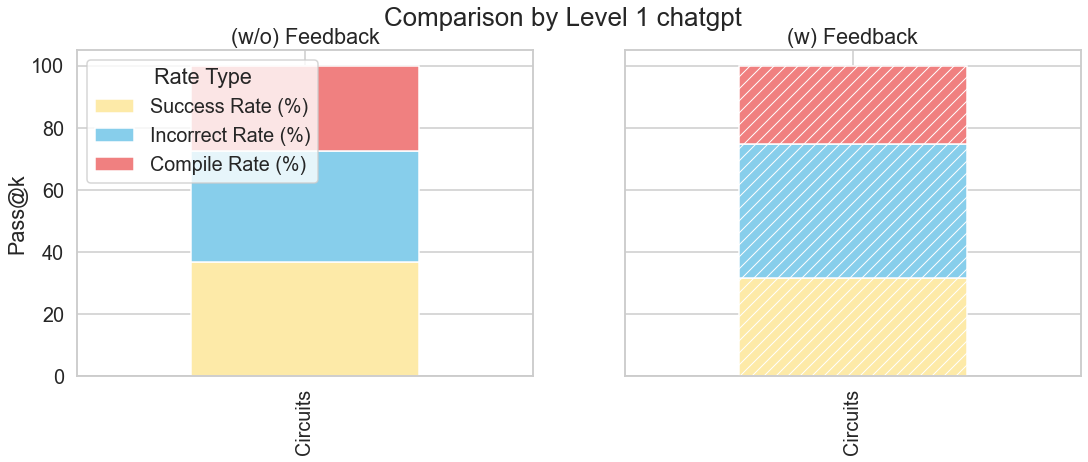

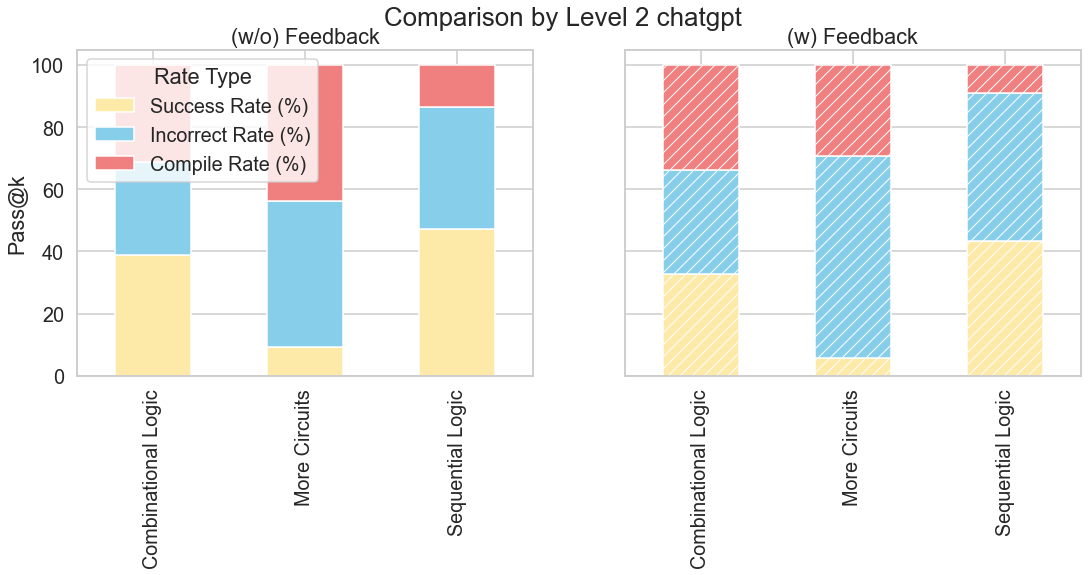

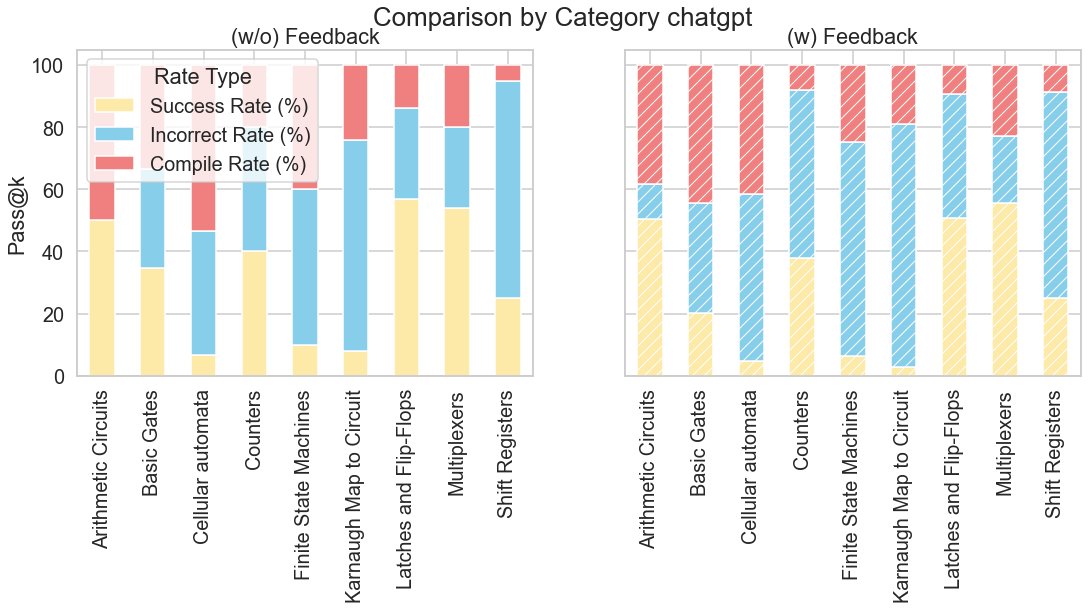

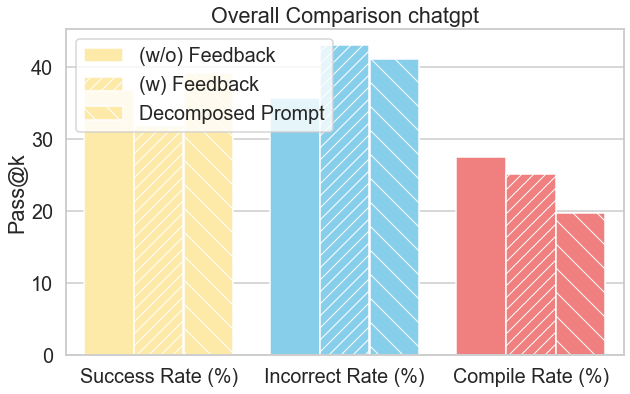

In [20]:

# Plotting the side-by-side comparison stacked bar plots for level1, level2, and category
plot_normalized_side_by_side_stacked_bars(final_summary_original_recounted, final_summary_feedback_recounted, 'level1', 'Comparison by Level 1 {}'.format(llm))
plot_normalized_side_by_side_stacked_bars(final_summary_original_recounted, final_summary_feedback_recounted, 'level2', 'Comparison by Level 2 {}'.format(llm))
plot_normalized_side_by_side_stacked_bars(final_summary_original_recounted, final_summary_feedback_recounted, 'category', 'Comparison by Category {}'.format(llm))
plot_overall_comparison_bars_custom_colors_with_pattern_corrected(final_summary_original_recounted, final_summary_feedback_recounted,final_summary_decom_recounted, 'Overall Comparison {}'.format(llm), 'Pass@k')




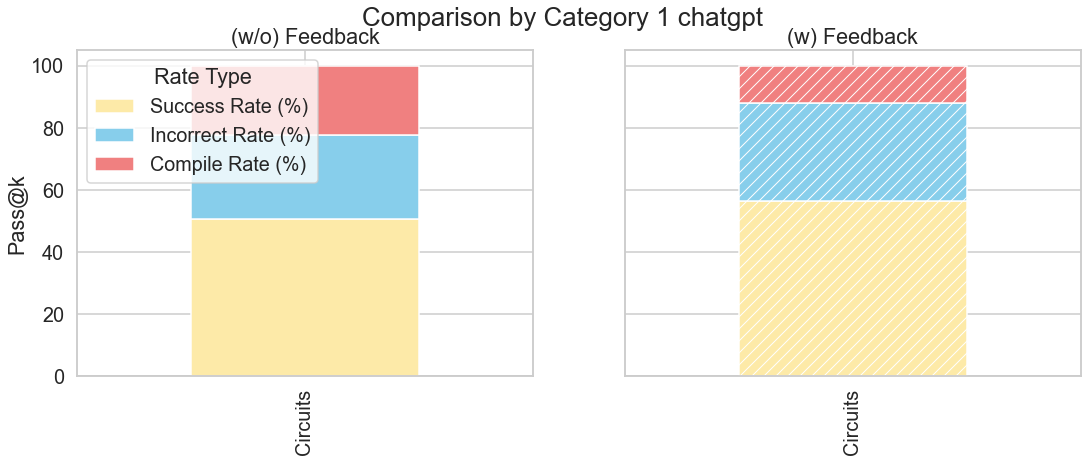

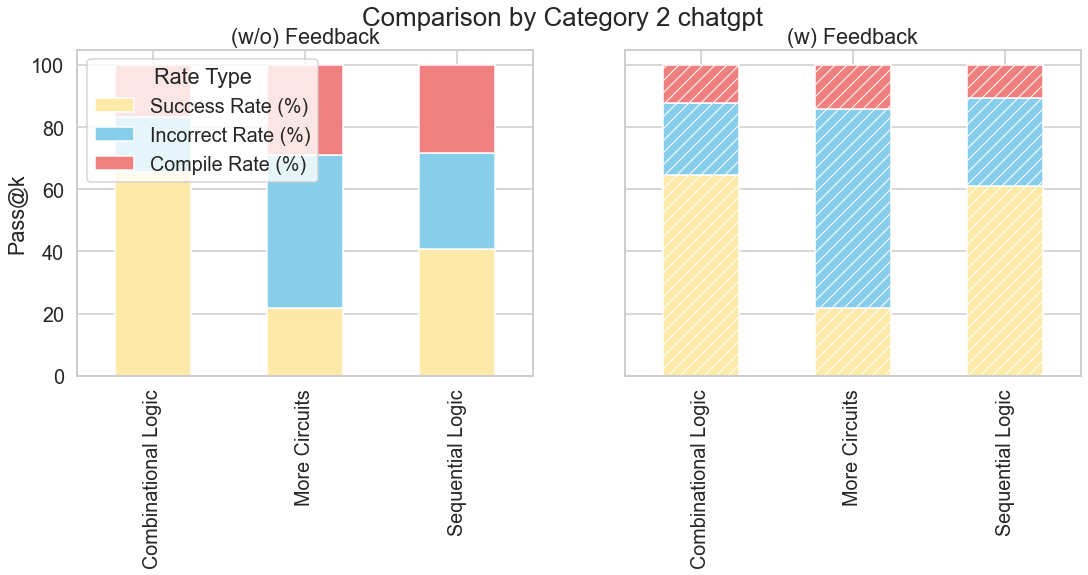

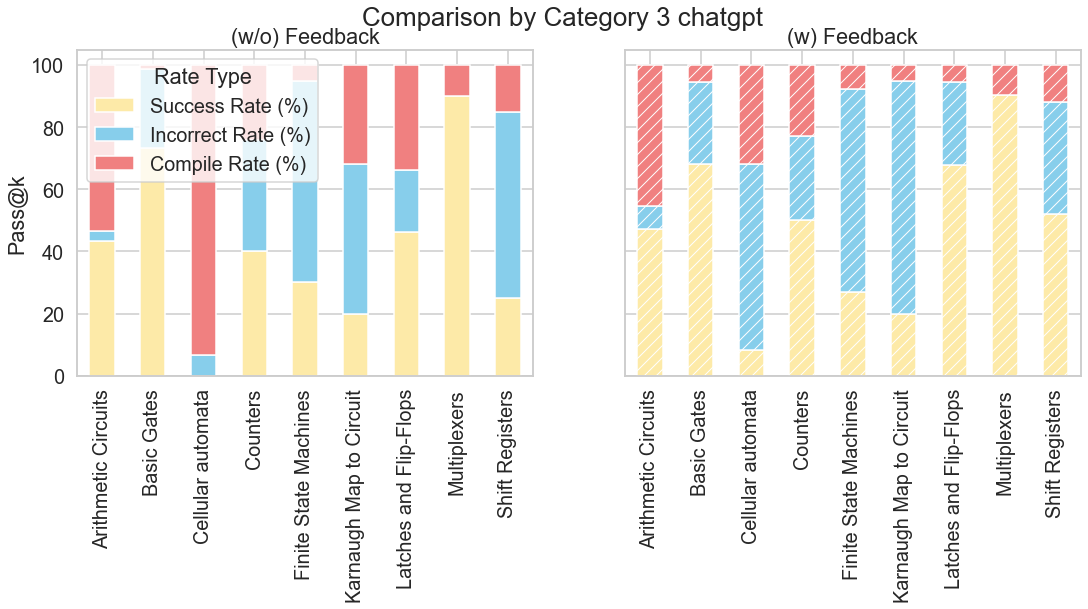

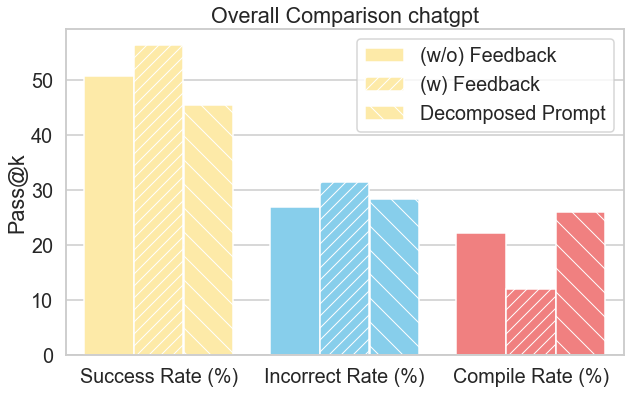

In [25]:

# Plotting the side-by-side comparison stacked bar plots for level1, level2, and category
plot_normalized_side_by_side_stacked_bars(final_summary_original_recounted, final_summary_feedback_recounted, 'level1', 'Comparison by Category 1 {}'.format(llm))
plot_normalized_side_by_side_stacked_bars(final_summary_original_recounted, final_summary_feedback_recounted, 'level2', 'Comparison by Category 2 {}'.format(llm))
plot_normalized_side_by_side_stacked_bars(final_summary_original_recounted, final_summary_feedback_recounted, 'category', 'Comparison by Category 3 {}'.format(llm))
# plot_overall_comparison_bars_custom_colors_corrected(final_summary_original_recounted, final_summary_feedback_recounted, 'Overall Comparison {}'.format(llm), 'Pass@k')
# Plotting the overall comparison with custom colors and pattern for feedback bars (corrected)
# plot_overall_comparison_bars_custom_colors_with_pattern_corrected(
#     final_summary_original_recounted, final_summary_feedback_recounted, 'Overall Comparison {}'.format(llm), 'Pass@k')
# Plotting the overall comparison with updated legend
plot_overall_comparison_bars_custom_colors_with_pattern_corrected(final_summary_original_recounted, final_summary_feedback_recounted,final_summary_decom_recounted, 'Overall Comparison {}'.format(llm), 'Pass@k')

# plot_overall_comparison_bars_custom_colors_with_pattern_updated(
    # final_summary_original_recounted, final_summary_feedback_recounted, final_summary_decom_recounted,'Overall Comparison', 'Rate (%)')


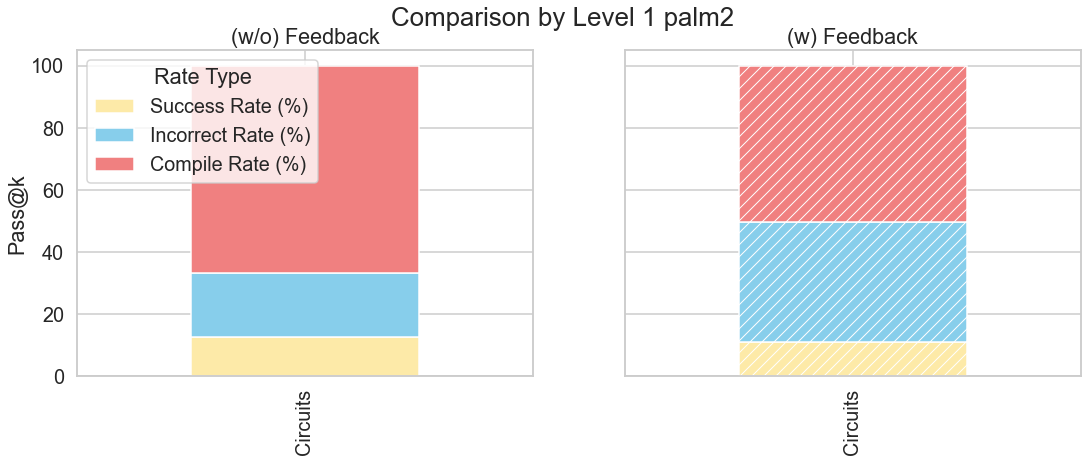

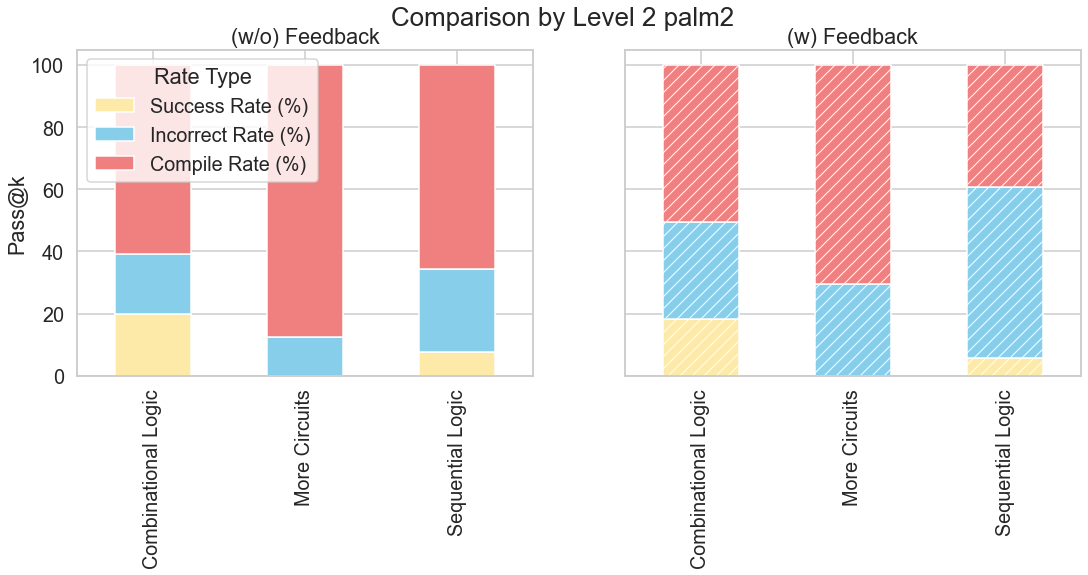

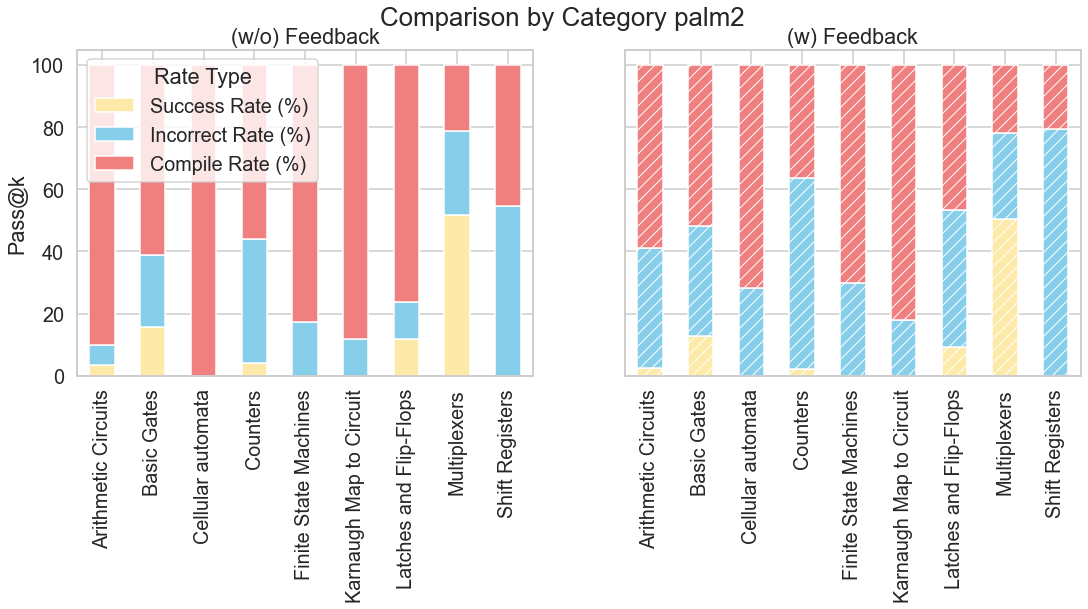

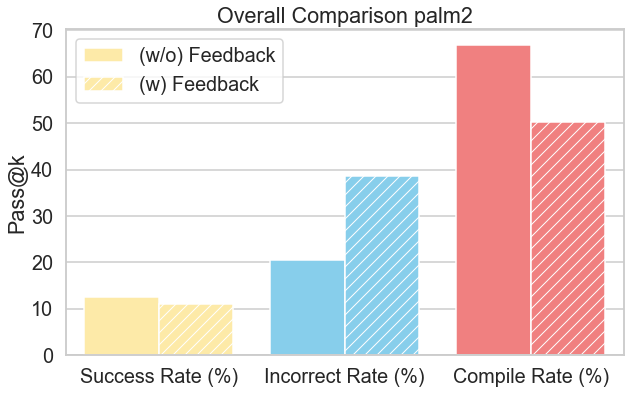

In [42]:

# Plotting the side-by-side comparison stacked bar plots for level1, level2, and category
plot_normalized_side_by_side_stacked_bars(final_summary_original_recounted, final_summary_feedback_recounted, 'level1', 'Comparison by Level 1 {}'.format(llm))
plot_normalized_side_by_side_stacked_bars(final_summary_original_recounted, final_summary_feedback_recounted, 'level2', 'Comparison by Level 2 {}'.format(llm))
plot_normalized_side_by_side_stacked_bars(final_summary_original_recounted, final_summary_feedback_recounted, 'category', 'Comparison by Category {}'.format(llm))
plot_overall_comparison_bars_custom_colors_with_pattern_corrected(final_summary_original_recounted, final_summary_feedback_recounted, 'Overall Comparison {}'.format(llm), 'Pass@k')


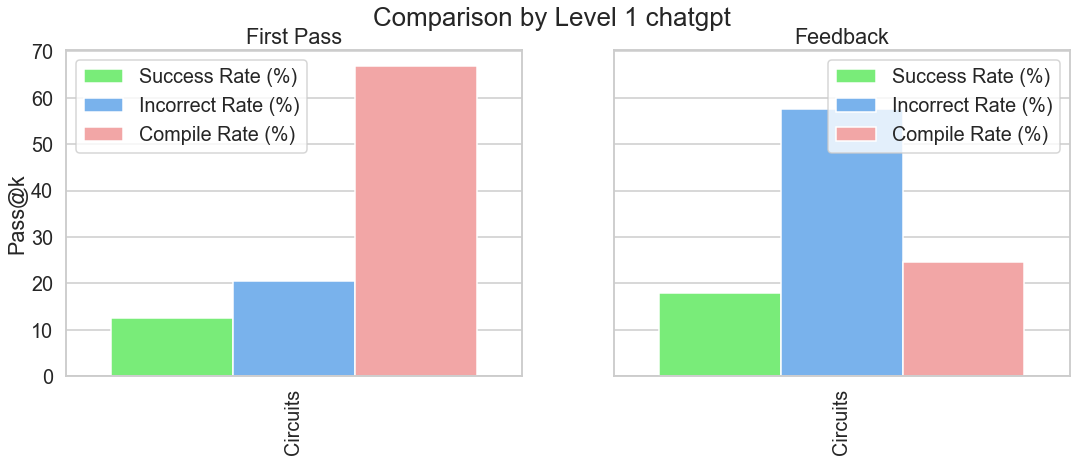

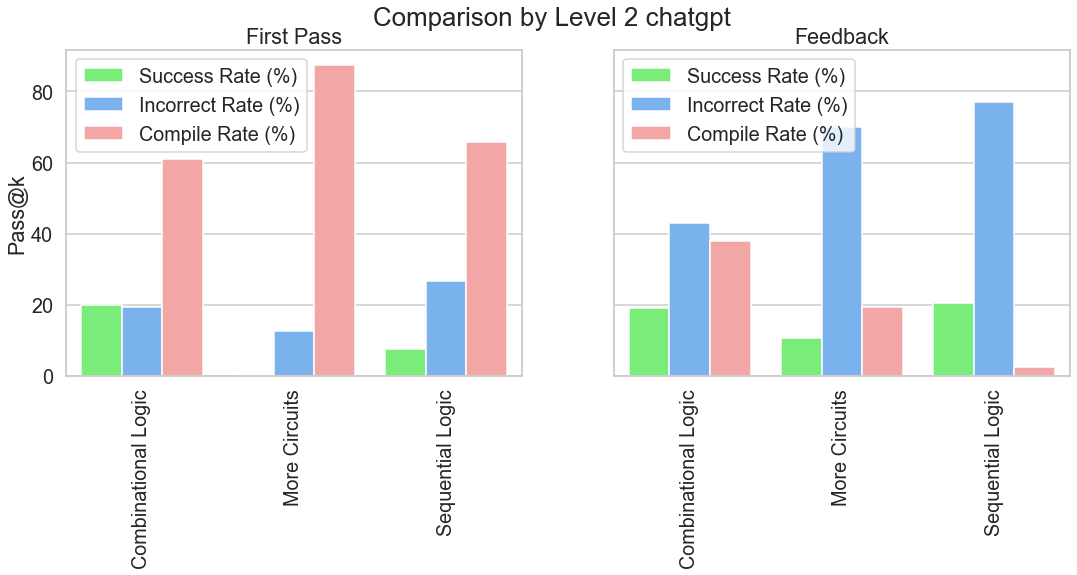

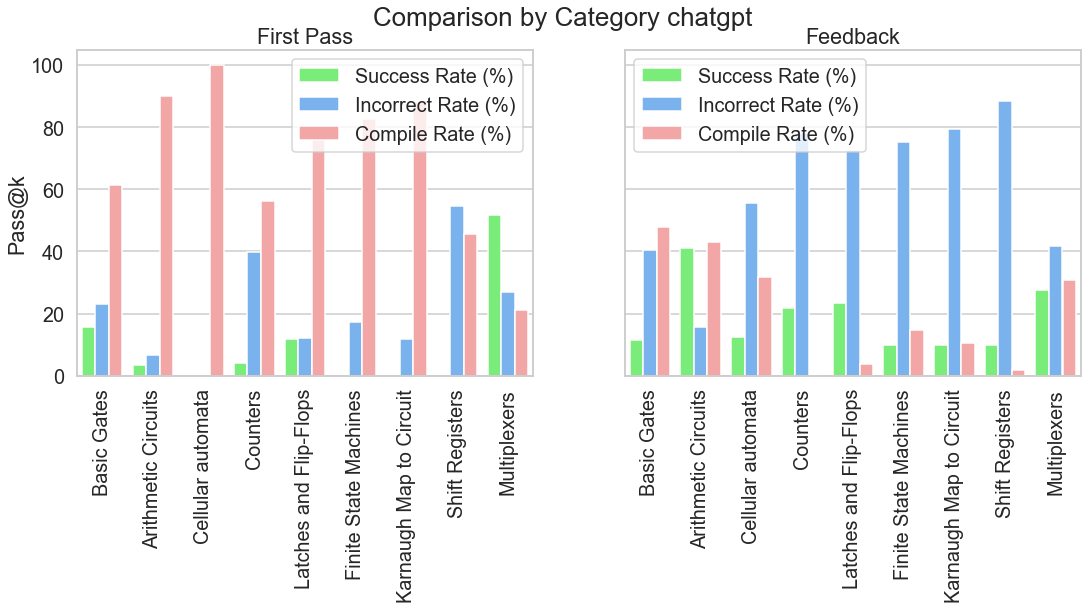

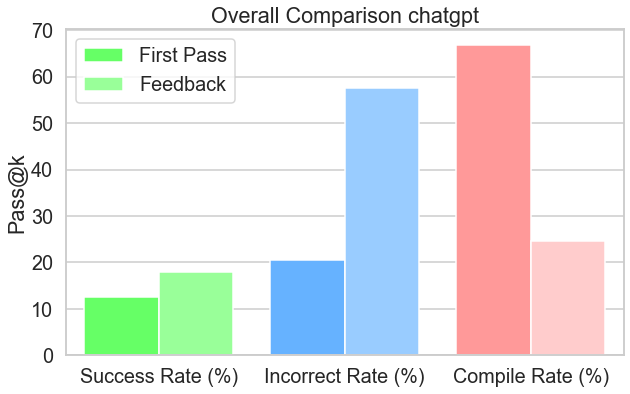

In [103]:
# Plotting the comparison bar plots with custom colors
plot_comparison_bars_custom_colors(final_summary_original_recounted, final_summary_feedback_recounted, 'level1', 'Comparison by Level 1 chatgpt', 'Pass@k')
plot_comparison_bars_custom_colors(final_summary_original_recounted, final_summary_feedback_recounted, 'level2', 'Comparison by Level 2 chatgpt', 'Pass@k')
plot_comparison_bars_custom_colors(final_summary_original_recounted, final_summary_feedback_recounted, 'category', 'Comparison by Category chatgpt', 'Pass@k')
# Plotting the overall comparison bar plot with specified custom colors (corrected)
plot_overall_comparison_bars_custom_colors_corrected(final_summary_original_recounted, final_summary_feedback_recounted, 'Overall Comparison chatgpt', 'Pass@k')


In [1]:
str=""" module top_module( 
    input [99:0] a, b,
    input cin,
    output [99:0] cout,
    output [99:0] sum );

    wire [99:0] carry;

    genvar i;
    generate
        for (i = 0; i < 100; i = i + 1) begin : full_adder
            full_adder fa(.a(a[i]), .b(b[i]), .cin(carry[i]), .sum(sum[i]), .cout(carry[i+1]));
        end
    endgenerate

    assign cout = carry[99];

endmodule

module full_adder(
    input a, b, cin,
    output sum, cout);

    assign sum = a ^ b ^ cin;
    assign cout = (a & b) | (a & cin) | (b & cin);

endmodule</s><s>[INST] Please implement the instantiated modules completely in the design and then re-run the testbench. [/INST] Sure, I'll update the design to include the instantiated modules and re-run the testbench.

"""

In [2]:
def find_verilog_modules(markdown_string, module_name='top_module'):

    module_pattern1 = r'\bmodule\b\s+\w+\s*\([^)]*\)\s*;.*?endmodule\b'

    module_pattern2 = r'\bmodule\b\s+\w+\s*#\s*\([^)]*\)\s*\([^)]*\)\s*;.*?endmodule\b'

    module_matches1 = re.findall(module_pattern1, markdown_string, re.DOTALL)

    module_matches2 = re.findall(module_pattern2, markdown_string, re.DOTALL)

    module_matches = module_matches1 + module_matches2

    if not module_matches:
        return []

    return module_matches

In [4]:
import re

find_verilog_modules(str)

['module top_module( \n    input [99:0] a, b,\n    input cin,\n    output [99:0] cout,\n    output [99:0] sum );\n\n    wire [99:0] carry;\n\n    genvar i;\n    generate\n        for (i = 0; i < 100; i = i + 1) begin : full_adder\n            full_adder fa(.a(a[i]), .b(b[i]), .cin(carry[i]), .sum(sum[i]), .cout(carry[i+1]));\n        end\n    endgenerate\n\n    assign cout = carry[99];\n\nendmodule',
 'module full_adder(\n    input a, b, cin,\n    output sum, cout);\n\n    assign sum = a ^ b ^ cin;\n    assign cout = (a & b) | (a & cin) | (b & cin);\n\nendmodule']